In [1]:
from math import pi
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# Problem parameters
nx = 41
ny = 41

l = 1.
h = 1.
U = 1.
dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def plot2D(x,y,val):
    X,Y = numpy.meshgrid(x,y)
    fig = pyplot.figure(figsize=(12,9))
    pyplot.contourf(X,Y,val,20, cmap = cm.viridis)

In [5]:
# Array initialization
x = numpy.linspace(0,l,nx)
y = numpy.linspace(0,h,ny)
omega = numpy.zeros((ny,nx))
psi = numpy.zeros((ny,nx))

omega[-1,1:-1] = -0.5/dy**2*(8*psi[-2,1:-1] - psi[-3,1:-1]) - 3*U/dy
omega[0,1:-1] = -0.5*dy**2*(8*psi[1,1:-1] - psi[2,1:-1])
omega[1:-1,0] = -0.5/dx**2*(8*psi[1:-1,1] - psi[1:-1,2])
omega[1:-1,-1] = -0.5/dx**2*(8*psi[1:-1,-2] - psi[1:-1,-3])

omega_n = numpy.copy(omega)
psi_n = numpy.copy(psi)

L1_norm = 1.0
it_counter = 0
conv_hist_omega = numpy.empty(0)
conv_hist_psi = numpy.empty(0)
while L1_norm > l1_target:
    omega_n = numpy.copy(omega)
    psi_n = numpy.copy(psi)

    omega[1:-1,1:-1] = ((omega_n[:-2,1:-1] + omega_n[2:,1:-1])*dx**2 + (omega_n[1:-1,:-2] + omega_n[1:-1,2:])*dy**2)/(2*(dx**2 + dy**2))
    psi[1:-1,1:-1] = ((psi_n[:-2,1:-1] + psi_n[2:,1:-1])*dx**2 + (psi_n[1:-1,:-2] + psi_n[1:-1,2:])*dy**2 + dx**2*dy**2*omega_n[1:-1,1:-1])/(2*(dx**2 + dy**2))
    
    omega[-1,1:-1] = -0.5/dy**2*(8*psi[-2,1:-1] - psi[-3,1:-1]) - 3*U/dy
    omega[0,1:-1] = -0.5/dy**2*(8*psi[1,1:-1] - psi[2,1:-1])
    omega[1:-1,0] = -0.5/dx**2*(8*psi[1:-1,1] - psi[1:-1,2])
    omega[1:-1,-1] = -0.5/dx**2*(8*psi[1:-1,-2] - psi[1:-1,-3])
    
    L1_norm_omega = L1norm(omega, omega_n)
    L1_norm_psi = L1norm(psi, psi_n)
    L1_norm = numpy.max(L1_norm_omega,L1_norm_psi)
    it_counter += 1
    conv_hist_omega = numpy.append(conv_hist_omega,L1_norm_omega)
    conv_hist_psi = numpy.append(conv_hist_psi,L1_norm_psi)
    
# Display information about convergence
print('Converged after',it_counter,'iterations')
print('Omega L1 residual is','% 0.3e' % L1_norm_omega)
print('Psi L1 residual is','% 0.3e' % L1_norm_psi)
conv_hist_omega = conv_hist_omega[1:]
conv_hist_psi = conv_hist_psi[1:]

Converged after 4059 iterations
Omega L1 residual is  9.997e-07
Psi L1 residual is  2.242e-08


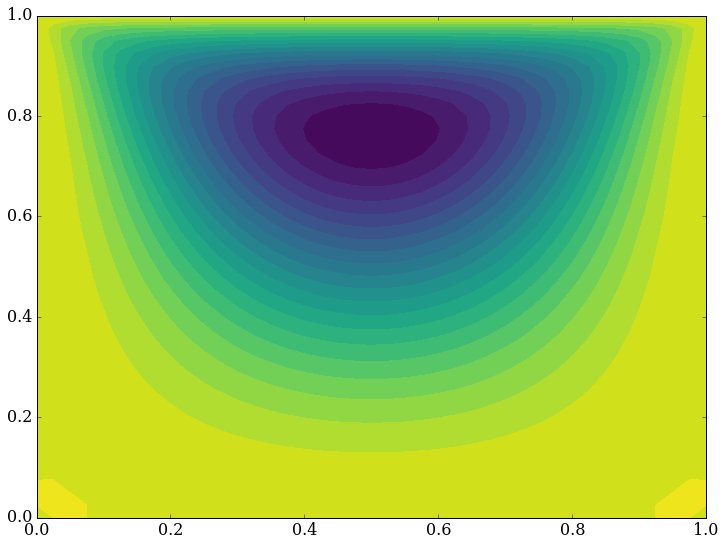

In [6]:
# We display the relaxed contours of stream function
plot2D(x,y,psi)

In [7]:
# Result post-processing
max_psi, max_omega = numpy.max(numpy.absolute(psi)),numpy.max(numpy.absolute(omega))
print('Maximum value of abs(psi) is','% 0.4f' % max_psi)
print('Maximum value of abs(omega) is','% 0.4f' % max_omega,'\n')
results_array = numpy.round(psi[32,::8], 4)
print('First number is','% 0.4f' % results_array[0])
print('Second number is','% 0.4f' % results_array[1])
print('Third number is','% 0.4f' % results_array[2])
print('Fourth number is','% 0.4f' % results_array[3])
print('Fifth number is','% 0.4f' % results_array[4])
print('Sixth number is','% 0.4f' % results_array[5])

Maximum value of abs(psi) is  0.0998
Maximum value of abs(omega) is  78.1927 

First number is  0.0000
Second number is -0.0575
Third number is -0.0944
Fourth number is -0.0944
Fifth number is -0.0575
Sixth number is  0.0000


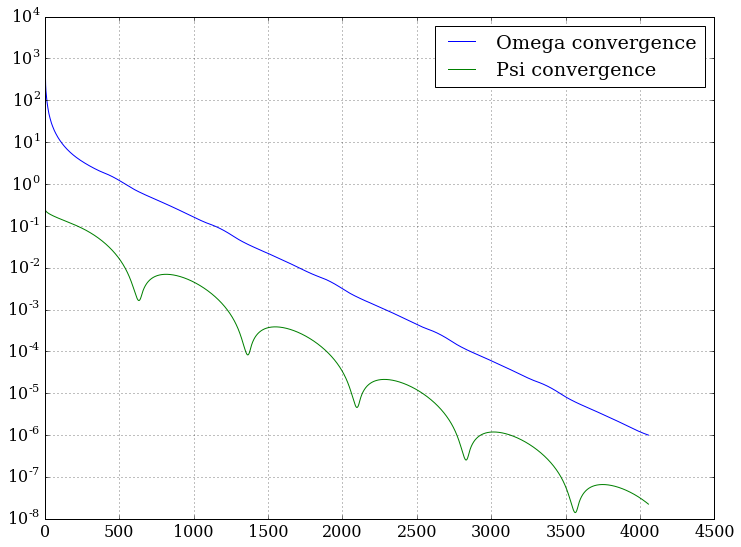

In [8]:
# Display convergence plot
pyplot.figure(figsize=(12,9))
pyplot.grid(True)
pyplot.plot(conv_hist_omega)
pyplot.plot(conv_hist_psi)
pyplot.yscale('log')
pyplot.legend(['Omega convergence','Psi convergence']);